In [1]:
import pandas as pd

# Milk report

In [19]:
df_milk = pd.read_csv('../data/reports/report_milk_20240601_20240630.csv')

In [20]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3650 non-null   object 
 1   day              3650 non-null   object 
 2   milk_production  3650 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.7+ KB


In [27]:
df_milk.sort_values(by=['id','day'])

,id,day,milk_production
3649,008d8c76-b26e-4780-b65a-cec19c9984b6,2024-06-01,9.34
3648,008d8c76-b26e-4780-b65a-cec19c9984b6,2024-06-02,4.78
3647,008d8c76-b26e-4780-b65a-cec19c9984b6,2024-06-03,9.40
3646,008d8c76-b26e-4780-b65a-cec19c9984b6,2024-06-04,14.28
3645,008d8c76-b26e-4780-b65a-cec19c9984b6,2024-06-05,18.78
...,...,...,...
4,fed3a6af-8729-4ac6-920a-f5487cb00dd9,2024-06-25,19.34
3,fed3a6af-8729-4ac6-920a-f5487cb00dd9,2024-06-26,24.06
2,fed3a6af-8729-4ac6-920a-f5487cb00dd9,2024-06-27,14.33
1,fed3a6af-8729-4ac6-920a-f5487cb00dd9,2024-06-28,14.55


Daily production of Milk for a given cow

/tmp/ipykernel_89793/1037432666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = pd.to_datetime(df_filtered['day'], errors='coerce')
/tmp/ipykernel_89793/1037432666.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['milk_production'] = pd.to_numeric(df_filtered['milk_production'], errors='coerce')


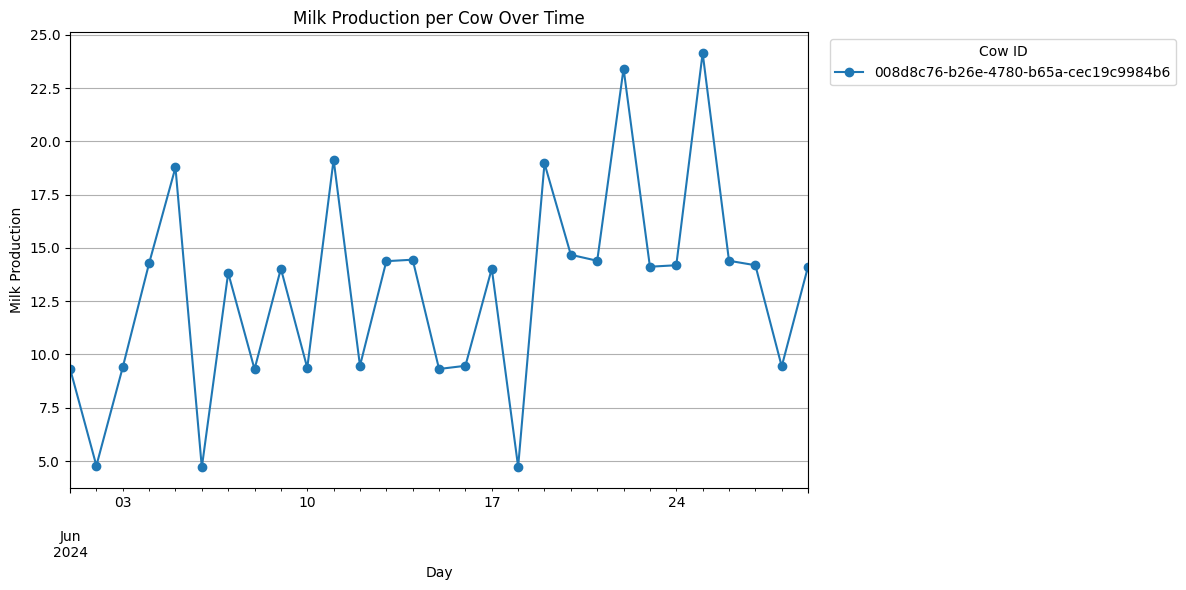

In [29]:
cow = '008d8c76-b26e-4780-b65a-cec19c9984b6'

import matplotlib.pyplot as plt

df_filtered = df_milk[df_milk['id'] == cow]
df_filtered['day'] = pd.to_datetime(df_filtered['day'], errors='coerce')
df_filtered['milk_production'] = pd.to_numeric(df_filtered['milk_production'], errors='coerce')

pivot = df_filtered.pivot(index='day', columns='id', values='milk_production').sort_index()
plt.figure(figsize=(12,6))

pivot.plot(marker='o', ax=plt.gca())
plt.title('Milk Production per Cow Over Time')
plt.xlabel('Day')
plt.ylabel('Milk Production')
plt.grid(True)
plt.legend(title='Cow ID', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Weights report

In [30]:
df_weight = pd.read_csv('../data/reports/report_weights_20240630.csv')

In [31]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          128 non-null    object 
 1   name                        128 non-null    object 
 2   last_measured_at            128 non-null    object 
 3   last_weight                 128 non-null    float64
 4   previous_30_day_weight_avg  128 non-null    float64
 5   data_status                 128 non-null    object 
 6   potentially_ill             128 non-null    bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 6.3+ KB


Current weight VS AVG of the previous 30 days for every cow.
Highlighted cows have suffered a sudden weight decrease in the recent days.

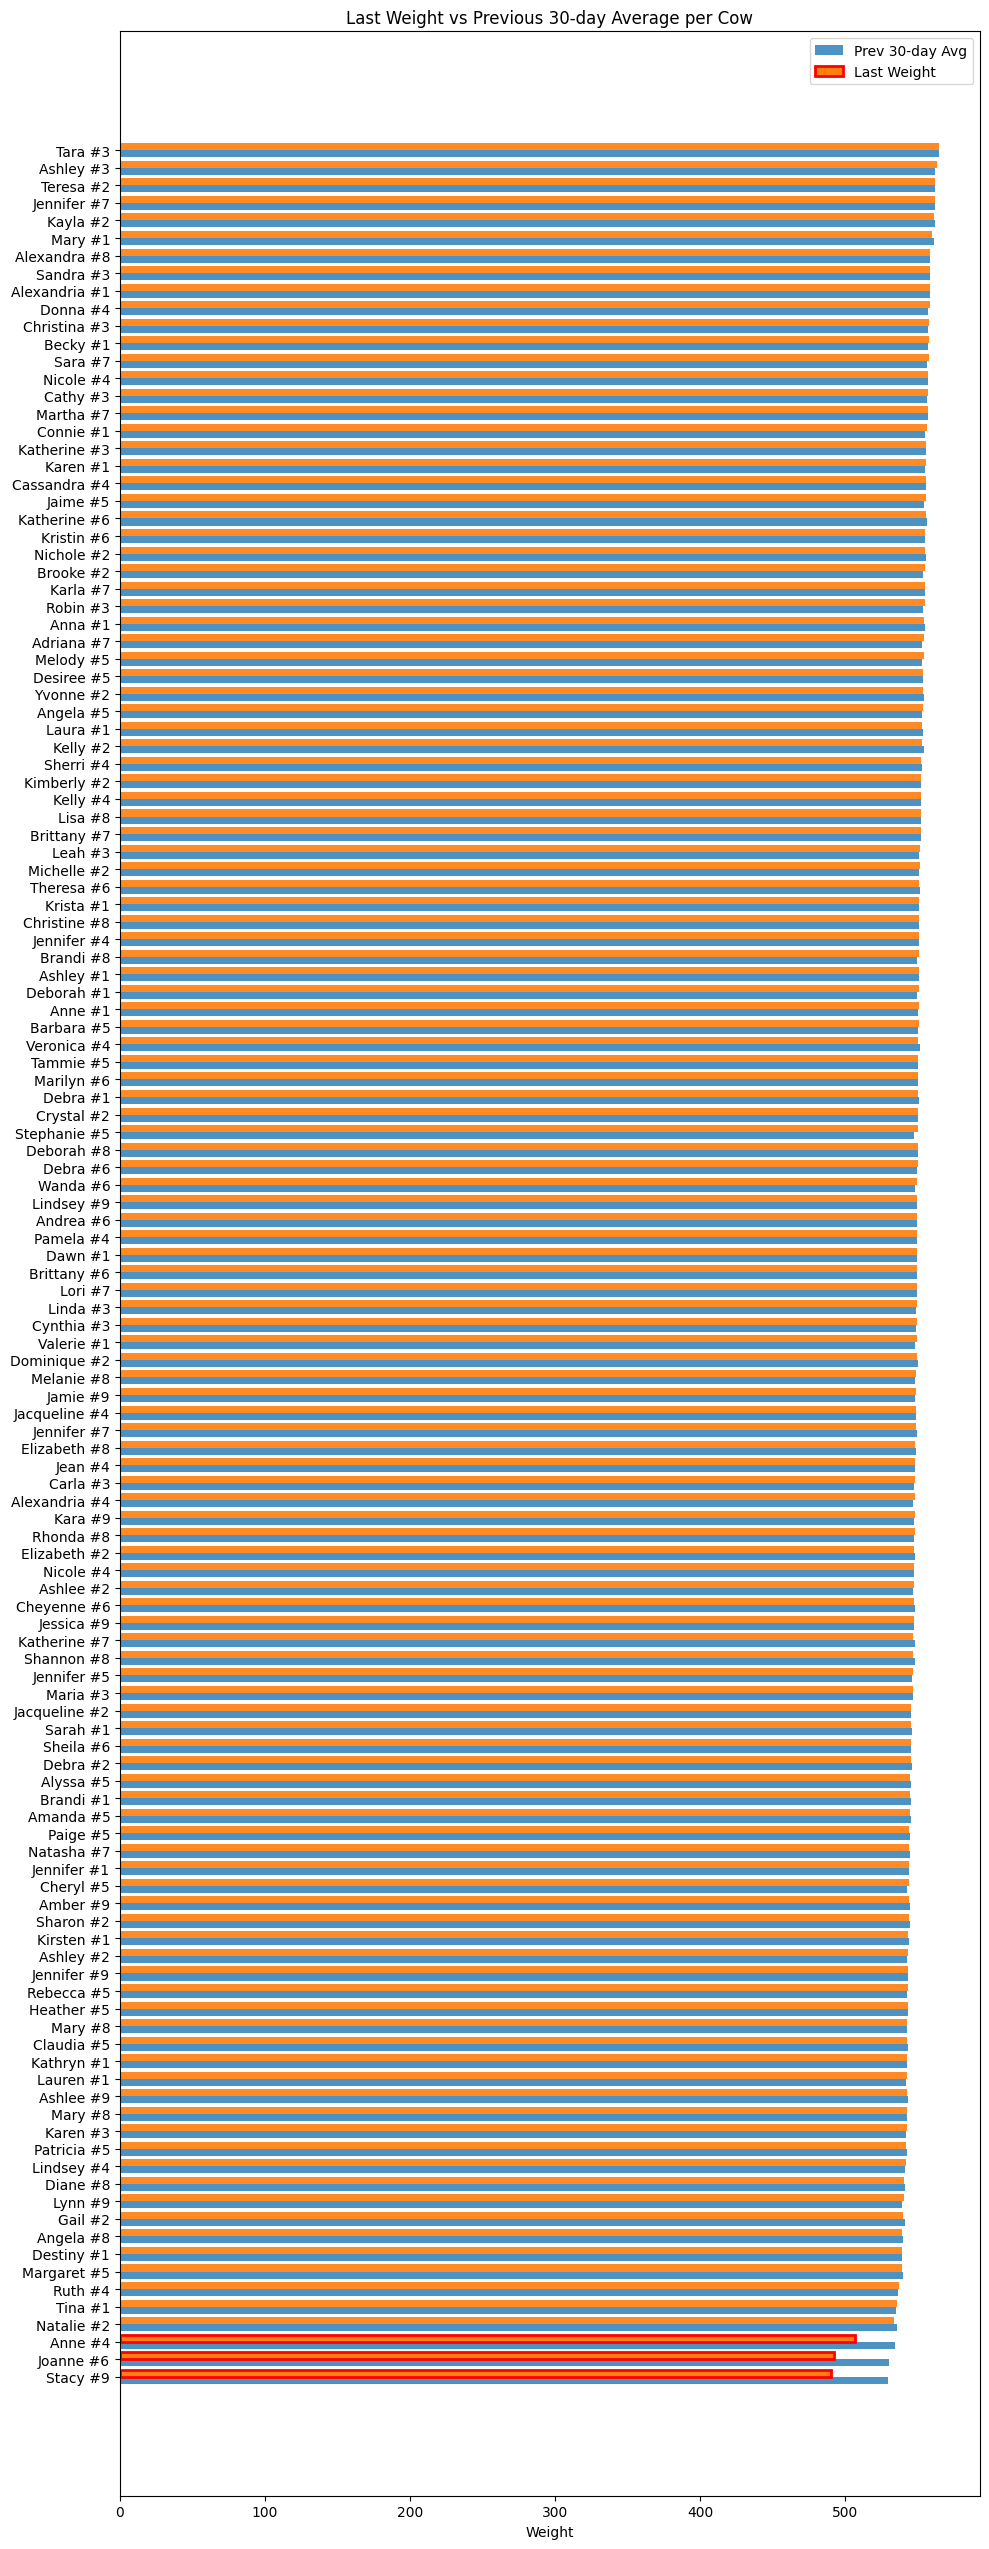

In [33]:
# Bar chart comparing last_weight and previous_30_day_weight_avg per cow
import matplotlib.pyplot as plt
import numpy as np

# Ensure columns types
df_weight['last_measured_at'] = pd.to_datetime(df_weight['last_measured_at'], errors='coerce')
df_weight['last_weight'] = pd.to_numeric(df_weight['last_weight'], errors='coerce')
df_weight['previous_30_day_weight_avg'] = pd.to_numeric(df_weight['previous_30_day_weight_avg'], errors='coerce')

# Sort by last_weight for readability
df_plot = df_weight.sort_values('last_weight', ascending=True).reset_index(drop=True)
labels = df_plot['name']
indices = np.arange(len(df_plot))
width = 0.4

fig, ax = plt.subplots(figsize=(10, max(6, len(df_plot)*0.2)))
# Bars for previous 30-day avg (left)
ax.barh(indices - width/2, df_plot['previous_30_day_weight_avg'], height=width, label='Prev 30-day Avg', color='tab:blue', alpha=0.8)
# Bars for last weight (right)
bars_last = ax.barh(indices + width/2, df_plot['last_weight'], height=width, label='Last Weight', color='tab:orange', alpha=0.9)

# Highlight cows flagged as potentially ill by changing edge color and alpha
ill_mask = df_plot['potentially_ill'].astype(bool)
for i, bar in enumerate(bars_last):
    if ill_mask.iloc[i]:
        bar.set_edgecolor('red')
        bar.set_linewidth(2)
        bar.set_alpha(1.0)

ax.set_yticks(indices)
ax.set_yticklabels(labels)
ax.set_xlabel('Weight')
ax.set_title('Last Weight vs Previous 30-day Average per Cow')
ax.legend()
plt.tight_layout()
plt.show()


Anne, Joanne and Stacy could be potentially ill

In [34]:
df_weight[df_weight['name'].isin(['Anne #4', 'Joanne #6', 'Stacy #9'])]

,id,name,last_measured_at,last_weight,previous_30_day_weight_avg,data_status,potentially_ill
12,4b54f862-7dd7-4569-950c-e071fd13c575,Anne #4,2024-06-29 22:00:00+00:00,506.55,534.750303,Active,True
63,33eb52d5-db1e-4a68-a911-f78574f12254,Joanne #6,2024-06-29 18:00:00+00:00,492.68,530.282169,Active,True
117,fa5625d5-d657-40a7-9de9-a52af87aef1f,Stacy #9,2024-06-29 18:00:00+00:00,490.19,529.614000,Active,True


In [38]:
ill_cows = ['4b54f862-7dd7-4569-950c-e071fd13c575', '33eb52d5-db1e-4a68-a911-f78574f12254', 'fa5625d5-d657-40a7-9de9-a52af87aef1f']

In [39]:
pd.set_option('display.max_rows', None)
df_milk[df_milk['id']\
    .isin(ill_cows)]\
    .sort_values(by=['id','day'])

,id,day,milk_production
2786,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-01,14.40
2785,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-02,19.20
2784,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-03,13.84
2783,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-04,14.29
2782,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-05,14.77
2781,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-06,9.49
2780,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-07,24.17
2779,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-08,18.95
2778,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-09,28.61
2777,33eb52d5-db1e-4a68-a911-f78574f12254,2024-06-10,18.54


/tmp/ipykernel_89793/1936551160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = pd.to_datetime(df_filtered['day'], errors='coerce')
/tmp/ipykernel_89793/1936551160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['milk_production'] = pd.to_numeric(df_filtered['milk_production'], errors='coerce')


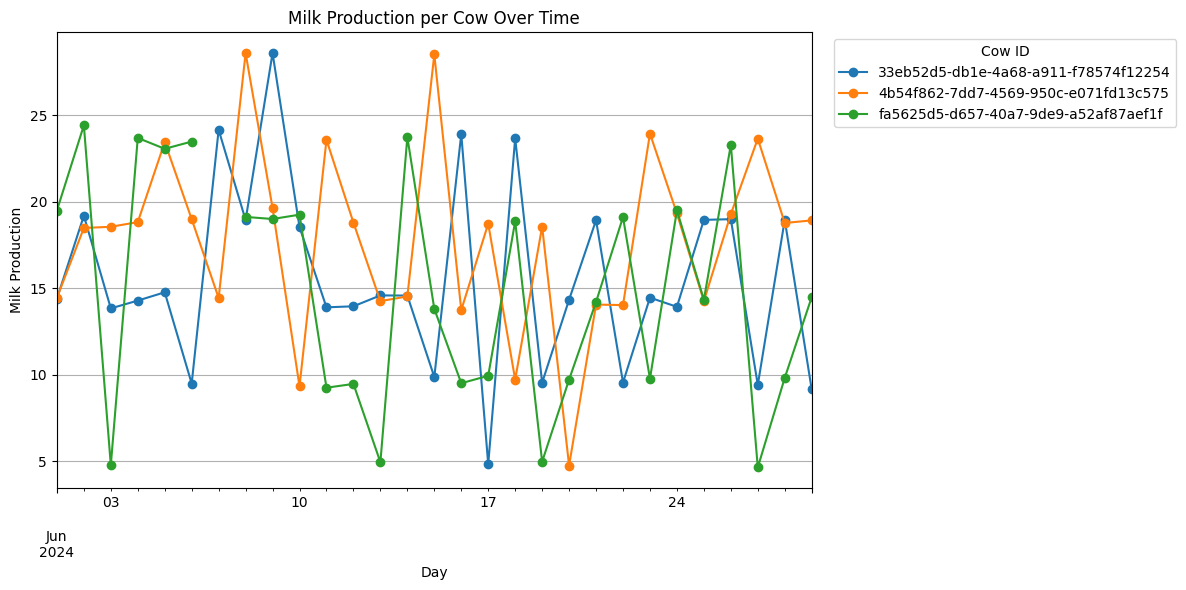

In [40]:
import matplotlib.pyplot as plt

df_filtered = df_milk[df_milk['id'].isin(ill_cows)]
df_filtered['day'] = pd.to_datetime(df_filtered['day'], errors='coerce')
df_filtered['milk_production'] = pd.to_numeric(df_filtered['milk_production'], errors='coerce')

pivot = df_filtered.pivot(index='day', columns='id', values='milk_production').sort_index()
plt.figure(figsize=(12,6))

pivot.plot(marker='o', ax=plt.gca())
plt.title('Milk Production per Cow Over Time')
plt.xlabel('Day')
plt.ylabel('Milk Production')
plt.grid(True)
plt.legend(title='Cow ID', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()